Submitted by: Navjiwan Hira

# CASE STUDY: SANTANDER CUSTOMER SATISFACTION

About the problem::

Santander Customer Satisfaction – Which customers are happy customers?” is a Featured Prediction Competition hosted by Kaggle in 2016 on the behalf of “Banco Santander” Bank, which is a large Corporation focusing primarily on the market in the north-eastern part of United States.
Kaggle introduces the problem to its readers by harping on the significance of “customer satisfaction” as the key measure of a business success. They further impinge upon the fact that unhappy customers rarely express their dis-satisfaction before leaving. Therefore, it is expected of the participants in the Competition to help identify dis-satisfied customers early on in the relationship so that proactive steps can be taken to improve customer satisfaction early on.The data shared by Santander Bank constitutes of Train-set with 76020 observations, 370 features and one binary target, a Test-set with 75818 observations and 370 features and also a sample submission file. The data consists of hundreds of anonymized features, which are to be leveraged effectively to find an appropriate model and consequently enable prediction with respect to a client’s satisfaction/dis-satisfaction in the near future. In order to evaluate the Machine-Learning models, the evaluation metric used by Santander Bank is “AUC”. The top leadership score obtained was 0.829072. The utility of the model would be that it will help the prestigious Santander Bank to identify dis-satisfied customers as early as possible so that they may be in a position to take necessary action to retain those customers.

# BASE LINE MODELS AFTER HANDLING DATA IMBALANCE USING SMOTE

In [1]:
#import the libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='muted',style='whitegrid')
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics,ensemble,model_selection,linear_model,tree,calibration
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import uniform

In [2]:
import pandas as pd
import numpy as np

In [3]:
train_data = pd.read_csv('D:/santander_train.csv')
test_data = pd.read_csv('D:/santander_test.csv')

In [4]:
print("The number of observations in Santander Train-Data are:",train_data.shape[0])
print("The number of features in Santander Train-Data are:",test_data.shape[1])

The number of observations in Santander Train-Data are: 76020
The number of features in Santander Train-Data are: 370


In [5]:
print("The number of observations in Santander Test-Data are:",test_data.shape[0])
print("The number of features in Santander Train-Data are:",test_data.shape[1])

The number of observations in Santander Test-Data are: 75818
The number of features in Santander Train-Data are: 370


In [6]:
train_data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [7]:
train_data.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

In [8]:
test_data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [9]:
test_data.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace2    float64
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
Length: 370, dtype: object

In [10]:
y_train = train_data['TARGET']

In [11]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
76015    0
76016    0
76017    0
76018    0
76019    0
Name: TARGET, Length: 76020, dtype: int64

In [12]:
y_train.shape

(76020,)

Firstly, getting those columns which have less than or equal to 10 nunique values Those features will be identified as "categorical"


In [13]:
categorical_feat = []
for column in train_data.columns:
    if (train_data[column].nunique()<=10) & (column!='TARGET') & (train_data[column].nunique()>2) & (column!='ID'):
        categorical_feat.append(column)

In [14]:
len(categorical_feat)

99

In [15]:
type(categorical_feat)

list

So, there are 99 features with more than 2 and less than or equal to 10 unique values

In [16]:
train_data[categorical_feat].shape

(76020, 99)

Now identify those features which have only 2 unique values

In [17]:
caty_feat_two = []
for column in train_data.columns:
    if (train_data[column].nunique()==2) & (column!='TARGET') & (column!='ID'):
        caty_feat_two.append(column)

In [18]:
len(caty_feat_two)

105

Hence, there are 105 features with 2 unique values

In [19]:
train_data[caty_feat_two].shape

(76020, 105)

Now identify those features which have only 1 unique values

In [20]:
caty_feat_one = []
for column in train_data.columns:
    if (train_data[column].nunique()==1) & (column!='TARGET') & (column!='ID'):
        caty_feat_one.append(column)

In [21]:
len(caty_feat_one)

34

Hence, there are 34 features with only 1 unique value

In [22]:
train_data[caty_feat_one].shape

(76020, 34)

Now identify those features which have more than 10 unique values

In [23]:
numerical_feat = []
for column in train_data.columns:
    if (train_data[column].nunique()>10) & (column!='TARGET') & (column!='ID'):
        numerical_feat.append(column)

In [24]:
len(numerical_feat)

131

Thus, there are 131 features with more than 10 unique values and we identify such features as "numerical-features"

In [25]:
train_data[numerical_feat].shape

(76020, 131)

ENCODING OF NUMERICAL FEATURES USING MIN-MAX SCALAR

In [26]:
from sklearn import preprocessing  #Ref: https://www.geeksforgeeks.org/ml-feature-scaling-part-2/
    
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
  
# Scaled feature
train_data_num = min_max_scaler.fit_transform(train_data[numerical_feat])
  
print ("\nAfter min max Scaling : \n", train_data_num)
print("shape", train_data_num.shape)
  
""" Standardisation """
  
Standardisation = preprocessing.StandardScaler()
  
# Scaled feature
train_data_numy = Standardisation.fit_transform(train_data[numerical_feat])
  
print ("\nAfter Standardisation : \n", train_data_numy)
print("shape", train_data_numy.shape)


After min max Scaling : 
 [[0.99976406 0.18       0.         ... 0.         0.         0.00154526]
 [0.99976406 0.29       0.         ... 0.         0.         0.0020025 ]
 [0.99976406 0.18       0.         ... 0.         0.         0.00282212]
 ...
 [0.99976406 0.18       0.         ... 0.         0.         0.003126  ]
 [0.99976406 0.2        0.         ... 0.         0.         0.00359128]
 [0.99976406 0.41       0.         ... 0.         0.         0.00509076]]
shape (76020, 131)

After Standardisation : 
 [[ 3.90744048e-02 -7.88248631e-01 -5.33881045e-02 ... -1.88169080e-02
  -1.98468529e-02 -4.27182680e-01]
 [ 3.90744048e-02  6.07525955e-02 -5.33881045e-02 ... -1.88169080e-02
  -1.98468529e-02 -3.72038298e-01]
 [ 3.90744048e-02 -7.88248631e-01 -5.33881045e-02 ... -1.88169080e-02
  -1.98468529e-02 -2.73191237e-01]
 ...
 [ 3.90744048e-02 -7.88248631e-01 -5.33881045e-02 ... -1.88169080e-02
  -1.98468529e-02 -2.36542515e-01]
 [ 3.90744048e-02 -6.33884772e-01 -5.33881045e-02 ... -1.8

In [27]:
from sklearn import preprocessing  #Ref: https://www.geeksforgeeks.org/ml-feature-scaling-part-2/
    
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
  
# Scaled feature
test_data_num = min_max_scaler.fit_transform(test_data[numerical_feat])
  
print ("\nAfter min max Scaling : \n", test_data_num)
print("shape", test_data_num.shape)
  
""" Standardisation """
  
Standardisation = preprocessing.StandardScaler()
  
# Scaled feature
test_data_numy = Standardisation.fit_transform(test_data[numerical_feat])
  
print ("\nAfter Standardisation : \n", test_data_numy)
print("shape", test_data_numy.shape)


After min max Scaling : 
 [[0.99976406 0.27       0.         ... 0.         0.         0.0013612 ]
 [0.99976406 0.3        0.         ... 0.         0.         0.00153268]
 [0.99976406 0.18       0.         ... 0.         0.         0.00158484]
 ...
 [0.99976406 0.19       0.         ... 0.         0.         0.00574866]
 [0.99976406 0.35       0.         ... 0.         0.         0.00401853]
 [0.99976406 0.18       0.         ... 0.         0.         0.00401853]]
shape (75818, 131)

After Standardisation : 
 [[ 3.97953966e-02 -8.80637178e-02 -4.90684752e-02 ... -2.06001940e-02
  -2.12458020e-02 -3.09975237e-01]
 [ 3.97953966e-02  1.43920495e-01 -4.90684752e-02 ... -2.06001940e-02
  -2.12458020e-02 -2.89991833e-01]
 [ 3.97953966e-02 -7.84016356e-01 -4.90684752e-02 ... -2.06001940e-02
  -2.12458020e-02 -2.83912742e-01]
 ...
 [ 3.97953966e-02 -7.06688285e-01 -4.90684752e-02 ... -2.06001940e-02
  -2.12458020e-02  2.01315149e-01]
 [ 3.97953966e-02  5.30560850e-01 -4.90684752e-02 ... -2.0

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ONE-HOT ENCODING OF FEATURES WITH LESS THAN 10 UNIQUE VALUES

In [29]:
# Reference: https://stackoverflow.com/questions/55525195/do-i-have-to-do-one-hot-encoding-separately-for-train-and-test-dataset
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(train_data[categorical_feat])

train_data_cat = enc.transform(train_data[categorical_feat]).toarray()


test_data_cat = enc.transform(test_data[categorical_feat]).toarray()

#enc_df = pd.DataFrame(enc.fit_transform(bridge_df[['Bridge_Types_Cat']]).toarray())

print("After vectorizations")
print(train_data_cat.shape)
print(test_data_cat.shape)

After vectorizations
(76020, 507)
(75818, 507)


In [30]:
type(train_data[categorical_feat])

pandas.core.frame.DataFrame

In [31]:
train_data_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [32]:
train_data_array = np.array(train_data)

In [33]:
train_data_array.shape

(76020, 371)

In [34]:
train_data_categorical_array = np.array(train_data[categorical_feat])

In [35]:
train_data_categorical_array.shape

(76020, 99)

In [36]:
test_data_categorical_array = np.array(test_data[categorical_feat])

In [37]:
test_data_categorical_array.shape

(75818, 99)

In [38]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(train_data_categorical_array)

train_data_cat_array = enc.transform(train_data_categorical_array)


test_data_cat_array = enc.transform(test_data_categorical_array)

print("After vectorizations")
print(train_data_cat_array.shape)
print(test_data_cat_array.shape)

After vectorizations
(76020, 507)
(75818, 507)


In [39]:
train_data_cat_array

<76020x507 sparse matrix of type '<class 'numpy.float64'>'
	with 7525980 stored elements in Compressed Sparse Row format>

In [40]:
# Reference: https://stackoverflow.com/questions/55525195/do-i-have-to-do-one-hot-encoding-separately-for-train-and-test-dataset
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(train_data[caty_feat_two])

train_data_cat_two = enc.transform(train_data[caty_feat_two]).toarray()


test_data_cat_two = enc.transform(test_data[caty_feat_two]).toarray()

#enc_df = pd.DataFrame(enc.fit_transform(bridge_df[['Bridge_Types_Cat']]).toarray())

print("After vectorizations")
print(train_data_cat_two.shape)
print(test_data_cat_two.shape)

After vectorizations
(76020, 210)
(75818, 210)


In [41]:
train_data_cat_two

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [42]:
train_data_cat_two_array = np.array(train_data[caty_feat_two])

In [43]:
train_data_cat_two_array.shape

(76020, 105)

In [44]:
test_data_cat_two_array = np.array(test_data[caty_feat_two])

In [45]:
test_data_cat_two_array.shape

(75818, 105)

In [46]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(train_data_cat_two_array)

train_data_cat_two_arr = enc.transform(train_data_cat_two_array)


test_data_cat_two_arr = enc.transform(test_data_cat_two_array)

print("After vectorizations")
print(train_data_cat_two_arr.shape)
print(test_data_cat_two_arr.shape)

After vectorizations
(76020, 210)
(75818, 210)


In [47]:
train_data_cat_one = np.array(train_data[caty_feat_one])

In [48]:
train_data_cat_one.shape

(76020, 34)

In [49]:
train_data_cat_one.shape

(76020, 34)

In [50]:
test_data_cat_one = np.array(test_data[caty_feat_one])

In [51]:
test_data_cat_one.shape

(75818, 34)

In [52]:
type(test_data_cat_one)

numpy.ndarray

STACKING ALL THE FEATURES TOGETHER

In [53]:
from scipy.sparse import hstack #stack sparse matrices horizontally

In [54]:
Xi_train=np.hstack([train_data_cat, train_data_cat_two, train_data_cat_one, train_data_num])

In [55]:
Xi_train.shape

(76020, 882)

In [56]:
Xi_test=np.hstack([test_data_cat, test_data_cat_two, test_data_cat_one, test_data_num])


In [57]:
Xi_test.shape

(75818, 882)

In [58]:
y_train.shape

(76020,)

In [59]:
import pickle

In [60]:
#!pip install imblearn

In [61]:
#!pip install imbalanced-learn

In [62]:
#!pip install imbalanced-learn==0.6.0

In [63]:
import imblearn 

In [64]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [65]:
import site
site.getsitepackages() 


['C:\\Users\\NAVJIWAN\\anaconda3',
 'C:\\Users\\NAVJIWAN\\anaconda3\\lib\\site-packages']

Reference: https://towardsdatascience.com/stop-using-smote-to-handle-all-your-imbalanced-data-34403399d3be

SMOTE stands for Synthetic Minority Over-Sampling Technique and is an over-sampling technique that creates synthetic minority
class data-points to balance the dataset. SMOTE works using k-nn algorithm to create synthetic data-points. 

The combination of SMOTE and some under-sampling techniques are proven effective and together can be considered as a new 
sampling technique.

Combination of SMOTE with Tomek Links:
    
Tomek Links is an under-samplingheuristic approach that identifies all pairs of data-points that are nearest to each other but
belong to different classes and these pairs are termed as Tomek links.

Heuristically, these Tomek links points (a,b) are present on the boundary of separation of two classes. So, removing the 
majority class of Tomek links points increases the class separation and also reduces the number of majority class samples along
the boundary of the majority cluster.

In [66]:
from imblearn.combine import SMOTETomek

SMOTE is an over-sampling technique which creates new majority class synthetic samples and Tomek links is an under-sampling 
technique. 

For an imbalanced dataset, first SMOTE is applied to create new synthetic minority samples to get a balanced distribution. 
Further, Tomek Links is used in removing the samples close to the boundary of two classes to increase separation btw the two 
classes.

In [67]:
sm = SMOTETomek(random_state=42)

In [68]:
Xi_train, y_train = sm.fit_resample(Xi_train, y_train)

Combination of SMOTE with ENN:
    
    ENN (Edited Nearest Neighbour) is an under-sampling technique which removes the instances of majority class on the 
    border or boundary whose predictions made by the KNN algorithm are different from the other majority class points.
    
    Similar to SMOTETomek, first SMOTE is applied to create synthetic data-points of minority class-samples, then using ENN the
    data-points on the border or boundary are removed to increase separation between two classes.

In [69]:
Xi_train.shape 

(138956, 882)

In [70]:
y_train.shape

(138956,)

In [71]:
Xi_train

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00154526],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0020025 ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00282212],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00476039],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00509076],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00509076]])

In [72]:
from imblearn.combine import SMOTEENN

In [73]:
#smt = SMOTEENN(random_state=42)
#Xi_train, y_train = smt.fit_resample(Xi_train,y_train)

observe whether data has been balanced

<AxesSubplot:>

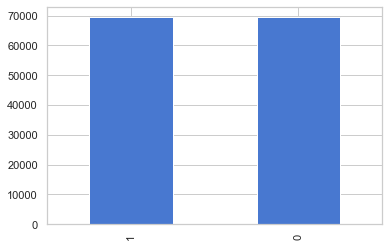

In [74]:

pd.Series(y_train).value_counts().plot.bar()

Performance Metric to be used:

Reference: https://stats.stackexchange.com/questions/210700/how-to-choose-between-roc-auc-and-f1-score
    
Precision: TP/(TP+FP)

Recall: TP/(TP+FN)

F1-score： 2/(1/P+1/R)

ROC/AUC： TPR=TP/(TP+FN), FPR=FP/(FP+TN)

If the objective of classification is scoring by probability, it is better to use AUC which averages over all possible 
thresholds. However, if the objective of classification just needs to classify between two possible classes and doesn't 
require how likely each class is predicted by the model, it is more appropriate to rely on F1-score using a particular threshold.

AUC (Area under ROC) is problematic especially when the data is imbalanced.
Therefore, in the present study, we balance the data using SMOTE




Log-Loss  

Reference: https://stats.stackexchange.com/questions/180116/when-is-log-loss-metric-appropriate-for-evaluating-performance-of-a-classifier
        
Log-loss is an appropriate performance measure when our model output is the probability of a binary outcome.

The log-loss measure considers confidence of the prediction when assessing how to penalize incorrect classification. For instance consider two predictions of an outcome P(Y=1|X), where the predictions are 0.51 and 0.99 respectively. In the former case the model is only slightly confident of the class prediction (assuming a 0.5 cutoff), while in the latter it is extremely confident. Since in our case both are wrong, the penalty will be more harsh for the more confident (but incorrect) prediction by employing a log-loss penalty.

Log Loss heavily penalises classifiers that are confident about an incorrect classification.

For example, if for a particular observation, the classifier assigns a very small probability to the correct class then the corresponding contribution to the Log Loss will be very large indeed. Naturally this is going to have a significant impact on the overall Log Loss for the classifier. The bottom line is that it’s better to be somewhat wrong than emphatically wrong. Of course it’s always better to be completely right, but that is seldom achievable in practice!

# Splitting the dataset

In [75]:
Xii_train,Xii_val,yi_train,yi_val = model_selection.train_test_split(Xi_train,y_train,stratify=y_train,test_size=0.20)
print(Xii_train.shape)
print(Xii_val.shape)
print(yi_train.shape)
print(yi_val.shape)

(111164, 882)
(27792, 882)
(111164,)
(27792,)


# LOGISTIC REGRESSION

In [96]:
import sklearn
from sklearn import linear_model

In [97]:
mudel = linear_model.LogisticRegression(class_weight='balanced')
params = {'penalty':['l2','l1'], 'C':[10.**i for i in np.arange(-3,3,1)], 
          'fit_intercept':[True,False],}

In [98]:
def best_params(model,params,cv=4,n_jobs=-1,train=Xii_train):
  
    random_cv = RandomizedSearchCV(model,param_distributions=params,scoring='roc_auc',n_jobs=n_jobs,cv=cv,verbose=2)
    random_cv.fit(Xii_train,yi_train)
    print("The best auc score is:",random_cv.best_score_)
    print("The best params are::",random_cv.best_params_)
    return random_cv.best_estimator_

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import uniform

In [100]:
muudel = linear_model.LogisticRegression(C=1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
muudel.fit(Xii_train,yi_train)

LogisticRegression(C=1, class_weight='balanced')

In [102]:
from sklearn.metrics import roc_curve, auc

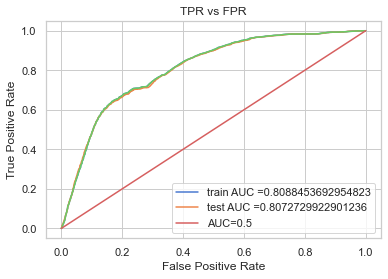

In [103]:
y_train_pred = muudel.predict_proba(Xii_train) [:,1]
y_test_pred = muudel.predict_proba(Xii_val) [:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(yi_train, y_train_pred)
test_fpr, test_tpr, test_thresh = roc_curve(yi_val, y_test_pred)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
sns.lineplot(train_fpr, train_tpr)
x=np.arange(0,1.1,0.1) #auc=0.5 line 
sns.lineplot(x,x,label="AUC=0.5")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TPR vs FPR")
plt.grid(True)
plt.show()

In [104]:
log_loss = metrics.log_loss(yi_val,y_test_pred) #getting logloss
print(log_loss)
print("The log loss after applying Logistic Regression is found to be:",(log_loss))
    

0.5449889607692208
The log loss after applying Logistic Regression is found to be: 0.5449889607692208


# DECISION TREES

In [87]:
model_dec = tree.DecisionTreeClassifier(class_weight='balanced')
params = { 'max_depth':[10,100,500,1000], 
         'min_samples_split':[2,5,10,100,500], 
          'min_samples_leaf':[1,3,5,7,10],
          'max_leaf_nodes':[100,500,1000,5000] }

In [88]:
best_params(model_dec,params,cv=2,n_jobs=-1,train=Xii_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
The best auc score is: 0.9563510248040897
The best params are:: {'min_samples_split': 100, 'min_samples_leaf': 5, 'max_leaf_nodes': 5000, 'max_depth': 500}


DecisionTreeClassifier(class_weight='balanced', max_depth=500,
                       max_leaf_nodes=5000, min_samples_leaf=5,
                       min_samples_split=100)

In [89]:
mudel_decy = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, splitter='best')

mudel_decy.fit(Xii_train,yi_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=100,
                       max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=500)

In [90]:
fi_model = calibration.CalibratedClassifierCV(mudel_decy,cv='prefit')
fi_model.fit(Xii_train,yi_train)

CalibratedClassifierCV(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                             max_depth=100,
                                                             max_leaf_nodes=100,
                                                             min_samples_leaf=3,
                                                             min_samples_split=500),
                       cv='prefit')

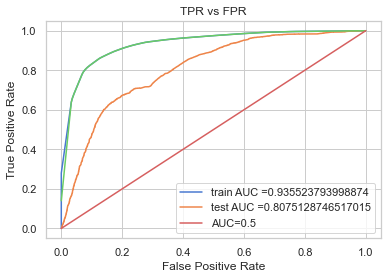

In [94]:
y_tr_pred = fi_model.predict_proba(Xii_train) [:,1]
y_te_pred = muudel.predict_proba(Xii_val) [:,1]
tr_fpr, tr_tpr, tr_thresh = roc_curve(yi_train, y_tr_pred)
te_fpr, te_tpr, te_thresh = roc_curve(yi_val, y_te_pred)
plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
sns.lineplot(tr_fpr, tr_tpr)
x=np.arange(0,1.1,0.1) #auc=0.5 line 
sns.lineplot(x,x,label="AUC=0.5")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TPR vs FPR")
plt.grid(True)
plt.show()

In [95]:
log_loss = metrics.log_loss(yi_val,y_te_pred) #getting logloss
print(log_loss)
print("The log loss after applying Decision Tree Classifier is found to be:",(log_loss))

0.5448867208471951
The log loss after applying Decision Tree Classifier is found to be: 0.5448867208471951


# NAIVE-BAYES MODEL

In [77]:
Xi_train_df = pd.DataFrame(Xi_train)

In [112]:
Xi_train_sampled = Xi_train_df.sample(frac =.40)

In [113]:
Xi_train_sampled

,0,1,2,3,4,5,6,7,8,9,...,872,873,874,875,876,877,878,879,880,881
97731,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003889
39658,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002384
125274,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001673
50083,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003621
27946,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58824,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004887
59071,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005091
71871,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003032
50419,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002681


In [114]:
Xi_train_sampled.index

Int64Index([ 97731,  39658, 125274,  50083,  27946,  94362,  58950, 135652,
             51308,  98037,
            ...
            133738, 105388, 138391, 109115, 113306,  58824,  59071,  71871,
             50419, 102585],
           dtype='int64', length=55582)

In [115]:
Xi_train_sampled_indices_lst = Xi_train_sampled.index.tolist()

In [116]:
len(Xi_train_sampled_indices_lst)

55582

In [117]:
yi_train_sampled = y_train[Xi_train_sampled_indices_lst]

In [118]:
yi_train_sampled

97731     1
39658     0
125274    1
50083     0
27946     0
         ..
58824     0
59071     0
71871     0
50419     1
102585    1
Name: TARGET, Length: 55582, dtype: int64

In [156]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

In [157]:
from sklearn.model_selection import GridSearchCV
clf_mud = GaussianNB()
params_of_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_nb = GridSearchCV(estimator=clf_mud, param_grid=params_of_NB,cv=5,scoring='roc_auc_ovr',return_train_score=True,n_jobs=-1,verbose=10)
gs_nb.fit(Xii_train, yi_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             return_train_score=True, scoring='roc_auc_ovr', verbose=10)

In [158]:
best_params = gs_nb.best_params_['var_smoothing']
best_params

1.0

In [159]:
_newmodel_gnb = GaussianNB(var_smoothing=best_params)
_newmodel_gnb.fit(Xii_train,yi_train)
y_tr_pred_gnb=_newmodel_gnb.predict(Xii_train)

In [160]:
f1_gnb_tr = f1_score(yi_train, y_tr_pred_gnb, average='weighted')
f1_gnb_tr

0.689940904633542

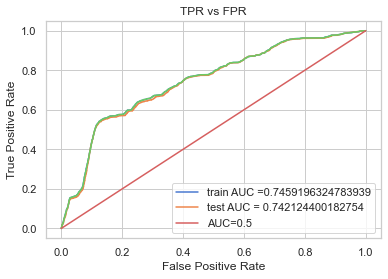

In [161]:
y_pred_nb = _newmodel_gnb.predict_proba(Xii_train) [:,1]
y_pred_test_gg = _newmodel_gnb.predict_proba(Xii_val) [:,1]
train_fpr_nb, train_tpr_nb, train_threshy_nb = roc_curve(yi_train, y_pred_nb)
test_fpr_nb, test_tpr_nb, test_threshy_nb = roc_curve(yi_val, y_pred_test_gg)
plt.plot(train_fpr_nb, train_tpr_nb, label="train AUC ="+str(auc(train_fpr_nb, train_tpr_nb)))
plt.plot(test_fpr_nb, test_tpr_nb, label="test AUC = "+str(auc(test_fpr_nb, test_tpr_nb)))
sns.lineplot(train_fpr_nb, train_tpr_nb)
x=np.arange(0,1.1,0.1) #auc=0.5 line 
sns.lineplot(x,x,label="AUC=0.5")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TPR vs FPR")
plt.grid(True)
plt.show()

In [162]:
log_loss_nb = metrics.log_loss(yi_val,y_pred_test_gg) #getting logloss
print(log_loss_nb)
print("The log loss after applying Naive-Bayes is found to be:",(log_loss_nb))
    

1.6718491290414867
The log loss after applying Naive-Bayes is found to be: 1.6718491290414867


# RANDOM-FOREST

In [145]:
model_ran = ensemble.RandomForestClassifier(class_weight='balanced')
params = { 'n_estimators':[1000,2000],
          'max_depth':[500,1000], 
         'min_samples_split':[100,500],
          'min_samples_leaf':[3,5],
          'max_leaf_nodes':[100,250] 
          }

In [149]:
def best_params(model,params,cv=4,n_jobs=-1,train=Xii_train):
  
    random_cv = RandomizedSearchCV(model,param_distributions=params,scoring='roc_auc',n_jobs=n_jobs,cv=cv,verbose=2)
    random_cv.fit(Xii_train,yi_train)
    print("The best auc score is:",random_cv.best_score_)
    print("The best params are::",random_cv.best_params_)
    return random_cv.best_estimator_

In [150]:
best_params(model_ran,params,cv=2,n_jobs=-1,train=Xii_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
The best auc score is: 0.9160832709435786
The best params are:: {'n_estimators': 1000, 'min_samples_split': 100, 'min_samples_leaf': 3, 'max_leaf_nodes': 250, 'max_depth': 500}


RandomForestClassifier(class_weight='balanced', max_depth=500,
                       max_leaf_nodes=250, min_samples_leaf=3,
                       min_samples_split=100, n_estimators=1000)

In [152]:
mudel_ran = ensemble.RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=500, max_features='auto',
                       max_leaf_nodes=250, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False,
                       verbose=0, warm_start=False)
mudel_ran.fit(Xii_train,yi_train)

RandomForestClassifier(class_weight='balanced', max_depth=500,
                       max_leaf_nodes=250, min_samples_leaf=3,
                       min_samples_split=100, n_estimators=1000, n_jobs=-1)

In [153]:
ran_model = calibration.CalibratedClassifierCV(mudel_ran,cv='prefit')
ran_model.fit(Xii_train,yi_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                             max_depth=500,
                                                             max_leaf_nodes=250,
                                                             min_samples_leaf=3,
                                                             min_samples_split=100,
                                                             n_estimators=1000,
                                                             n_jobs=-1),
                       cv='prefit')

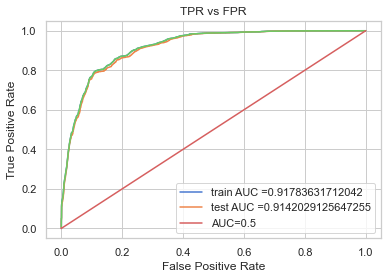

In [154]:
y_tr_predi = ran_model.predict_proba(Xii_train) [:,1]
y_te_predi = ran_model.predict_proba(Xii_val) [:,1]
train_fpr_s, train_tpr_s, train_threshy = roc_curve(yi_train, y_tr_predi)
test_fpr_s, test_tpr_s, test_threshy = roc_curve(yi_val, y_te_predi)
plt.plot(train_fpr_s, train_tpr_s, label="train AUC ="+str(auc(train_fpr_s, train_tpr_s)))
plt.plot(test_fpr_s, test_tpr_s, label="test AUC ="+ str(auc(test_fpr_s, test_tpr_s)))
sns.lineplot(train_fpr_s, train_tpr_s)
x=np.arange(0,1.1,0.1) #auc=0.5 line 
sns.lineplot(x,x,label="AUC=0.5")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TPR vs FPR")
plt.grid(True)
plt.show()

In [155]:
log_loss = metrics.log_loss(yi_val,y_te_predi) #getting logloss
print(log_loss)
print("The log loss after applying Random-Forest is found to be:",(log_loss))
    

0.3779894580178169
The log loss after applying Random-Forest is found to be: 0.3779894580178169


# LIGHT GBM Classifier

In [107]:
import lightgbm as lgb

In [108]:
model_light = lgb.LGBMClassifier(n_jobs=-1, nthread=-1, scale_pos_weight=1, learning_rate=0.02, colsample_bytree = 0.5,
                      subsample = 0.8, objective='binary', n_estimators=375, reg_alpha = 0.4,
                      max_depth=7, random_state=42)

In [109]:
evaluation_metrics = ['auc','error']

In [110]:
model_light.fit(Xii_train,yi_train,eval_set=[(Xii_val,yi_val)],eval_metric=evaluation_metrics,verbose=True)

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
[1]	valid_0's auc: 0.850977	valid_0's binary_error: 0.221503	valid_0's binary_logloss: 0.685346
[2]	valid_0's auc: 0.916318	valid_0's binary_error: 0.158463	valid_0's binary_logloss: 0.675807
[3]	valid_0's auc: 0.920401	valid_0's binary_error: 0.149755	valid_0's binary_logloss: 0.666843
[4]	valid_0's auc: 0.92371	valid_0's binary_error: 0.151339	valid_0's binary_logloss: 0.659462
[5]	valid_0's auc: 0.924954	valid_0's binary_error: 0.140364	valid_0's binary_logloss: 0.651152
[6]	valid_0's auc: 0.924582	valid_0's binary_error: 0.141516	valid_0's binary_logloss: 0.643204
[7]	valid_0's auc: 0.923312	valid_0's binary_error: 0.14792	valid_0's binary_logloss: 0.635565
[8]	valid_0's auc: 0.923977	valid_0's binary_error: 0.145006	valid_0's binary_logloss: 0.627654
[9]	valid_0's auc: 0.924489	valid_0's binary_error: 0.14112	valid_0's binary_logloss: 0.620855
[10]	valid_0's auc: 0.926

LGBMClassifier(colsample_bytree=0.5, learning_rate=0.02, max_depth=7,
               n_estimators=375, nthread=-1, objective='binary',
               random_state=42, reg_alpha=0.4, scale_pos_weight=1,
               subsample=0.8)

In [196]:
# save the model to disk
#filename = 'E:/light_gbm_santander_model.sav'
#pickle.dump(model_light, open(filename, 'wb'))
 

In [197]:
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

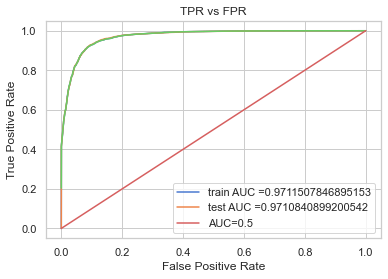

In [111]:
from sklearn.metrics import roc_curve, auc
y_train_prr = model_light.predict_proba(Xii_train) [:,1]
y_test_prr = model_light.predict_proba(Xii_val) [:,1]
train_fpr_t, train_tpr_t, train_threshy_t = roc_curve(yi_train, y_train_prr)
test_fpr_t, test_tpr_t, test_threshy_t = roc_curve(yi_val, y_test_prr)
plt.plot(train_fpr_t, train_tpr_t, label="train AUC ="+str(auc(train_fpr_t, train_tpr_t)))
plt.plot(test_fpr_t, test_tpr_t, label="test AUC ="+str(auc(test_fpr_t, test_tpr_t)))
sns.lineplot(train_fpr_t, train_tpr_t)
x=np.arange(0,1.1,0.1) #auc=0.5 line 
sns.lineplot(x,x,label="AUC=0.5")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TPR vs FPR")
plt.grid(True)
plt.show()

In [112]:
log_loss = metrics.log_loss(yi_val,y_test_prr) #getting logloss
print(log_loss)
print("The log loss after applying Light-GBM is found to be:",(log_loss))
    

0.2301796707060874
The log loss after applying Light-GBM is found to be: 0.2301796707060874


In [115]:
y_predy = model_light.predict_proba(Xii_val) 

In [116]:
y_predy

array([[0.05768753, 0.94231247],
       [0.9775784 , 0.0224216 ],
       [0.18344162, 0.81655838],
       ...,
       [0.44117993, 0.55882007],
       [0.12793238, 0.87206762],
       [0.0248519 , 0.9751481 ]])

In [117]:
len(y_predy)

27792

Hyper-parameter Tuning

There are different methods for optimizing hyper-parameters:

    Grid-Search
    
    Random-Search

Grid-Search is a traditional way to perform hyper-parameter optimization. It works by searching exhaustively through a specified

sub-set of hyper-parameters.

Using sklearn's Gridsearch CV, we first define our grid of parameters to search over and then run the grid search

# CAT-BOOST MODEL

In [121]:
import catboost as cb
from sklearn.model_selection import GridSearchCV

In [122]:
params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [30]}
cb = cb.CatBoostClassifier()
cb_model = GridSearchCV(cb, params, scoring="roc_auc", cv = 3)
cb_model.fit(Xii_train, yi_train)


0:	learn: 0.6803840	total: 197ms	remaining: 5.72s
1:	learn: 0.6681993	total: 224ms	remaining: 3.14s
2:	learn: 0.6572277	total: 250ms	remaining: 2.25s
3:	learn: 0.6465589	total: 279ms	remaining: 1.81s
4:	learn: 0.6369553	total: 308ms	remaining: 1.54s
5:	learn: 0.6275068	total: 337ms	remaining: 1.35s
6:	learn: 0.6180180	total: 366ms	remaining: 1.2s
7:	learn: 0.6059544	total: 394ms	remaining: 1.08s
8:	learn: 0.5977122	total: 424ms	remaining: 990ms
9:	learn: 0.5905382	total: 454ms	remaining: 908ms
10:	learn: 0.5832813	total: 481ms	remaining: 831ms
11:	learn: 0.5768708	total: 508ms	remaining: 763ms
12:	learn: 0.5707751	total: 537ms	remaining: 702ms
13:	learn: 0.5647723	total: 566ms	remaining: 647ms
14:	learn: 0.5589192	total: 592ms	remaining: 592ms
15:	learn: 0.5504698	total: 623ms	remaining: 545ms
16:	learn: 0.5458763	total: 655ms	remaining: 501ms
17:	learn: 0.5413430	total: 683ms	remaining: 455ms
18:	learn: 0.5366595	total: 713ms	remaining: 413ms
19:	learn: 0.5326222	total: 740ms	remainin

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000169D8A12B50>,
             param_grid={'depth': [4, 7, 10], 'iterations': [30],
                         'l2_leaf_reg': [1, 4, 9],
                         'learning_rate': [0.03, 0.1, 0.15]},
             scoring='roc_auc')

In [125]:
print(cb_model.best_estimator_)

#returns the best score
print(cb_model.best_score_)

#returns the best parameters
print(cb_model.best_params_)

0.9650880184499065
{'depth': 10, 'iterations': 30, 'l2_leaf_reg': 1, 'learning_rate': 0.15}


In [126]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(depth=10, iterations= 30, l2_leaf_reg= 1, learning_rate= 0.15) #eval_metric=["roc_auc", "AUC"]
clf.fit(Xii_train,yi_train)

0:	learn: 0.5889867	total: 633ms	remaining: 18.4s
1:	learn: 0.5082312	total: 1.28s	remaining: 18s
2:	learn: 0.4693168	total: 1.94s	remaining: 17.5s
3:	learn: 0.4428210	total: 2.57s	remaining: 16.7s
4:	learn: 0.4054637	total: 3.19s	remaining: 15.9s
5:	learn: 0.3749002	total: 3.81s	remaining: 15.2s
6:	learn: 0.3483751	total: 4.41s	remaining: 14.5s
7:	learn: 0.3321170	total: 5.01s	remaining: 13.8s
8:	learn: 0.3224203	total: 5.64s	remaining: 13.2s
9:	learn: 0.3169368	total: 6.31s	remaining: 12.6s
10:	learn: 0.3096175	total: 6.95s	remaining: 12s
11:	learn: 0.3035000	total: 7.6s	remaining: 11.4s
12:	learn: 0.2923949	total: 8.25s	remaining: 10.8s
13:	learn: 0.2844585	total: 8.91s	remaining: 10.2s
14:	learn: 0.2798140	total: 9.57s	remaining: 9.57s
15:	learn: 0.2727020	total: 10.2s	remaining: 8.93s
16:	learn: 0.2678912	total: 10.8s	remaining: 8.3s
17:	learn: 0.2635398	total: 11.5s	remaining: 7.66s
18:	learn: 0.2614345	total: 12.1s	remaining: 7.02s
19:	learn: 0.2591435	total: 12.8s	remaining: 6.

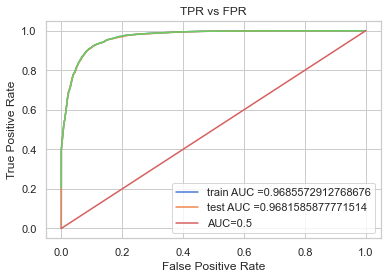

In [128]:
y_train_prr = clf.predict_proba(Xii_train) [:,1]
y_test_prr = clf.predict_proba(Xii_val) [:,1]
train_fpr_t, train_tpr_t, train_threshy_t = roc_curve(yi_train, y_train_prr)
test_fpr_t, test_tpr_t, test_threshy_t = roc_curve(yi_val, y_test_prr)
plt.plot(train_fpr_t, train_tpr_t, label="train AUC ="+str(auc(train_fpr_t, train_tpr_t)))
plt.plot(test_fpr_t, test_tpr_t, label="test AUC ="+str(auc(test_fpr_t, test_tpr_t)))
sns.lineplot(train_fpr_t, train_tpr_t)
x=np.arange(0,1.1,0.1) #auc=0.5 line 
sns.lineplot(x,x,label="AUC=0.5")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TPR vs FPR")
plt.grid(True)
plt.show()

In [130]:
log_loss_cat = metrics.log_loss(yi_val,y_test_prr) #getting logloss
print(log_loss_cat)
print("The log loss after applying Cat-Boost Classifier is found to be:",(log_loss_cat))
    

0.23992429443383678
The log loss after applying Cat-Boost Classifier is found to be: 0.23992429443383678


# K-NN Classifier

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [132]:
from sklearn import metrics

In [133]:
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xii_train, yi_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 1


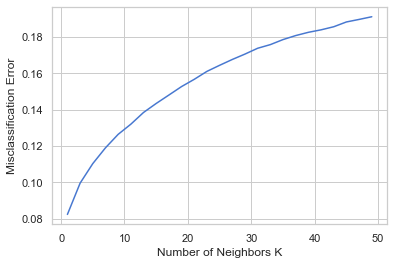

In [134]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

Now train with best value of k

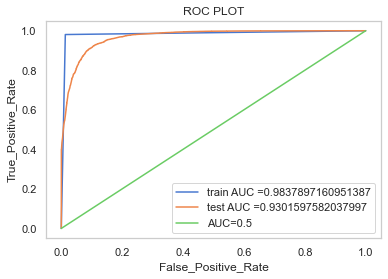

In [136]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(Xii_train, yi_train)



y_train_pred = neigh.predict_proba(Xii_train)[:,1]    
y_val_pred = neigh.predict_proba(Xii_val)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(yi_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(yi_val, y_val_pred)

#test_fpr_t, test_tpr_t = roc_curve(yi_val, y_val_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
#plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))

plt.plot(test_fpr_t, test_tpr_t, label="test AUC ="+str(auc(test_fpr, test_tpr)))

x=np.arange(0,1.1,0.1) #auc=0.5 line 
sns.lineplot(x,x,label="AUC=0.5")

plt.legend()
plt.xlabel("False_Positive_Rate")
plt.ylabel("True_Positive_Rate")
plt.title("ROC PLOT")
plt.grid()
plt.show()

In [137]:
log_loss = metrics.log_loss(yi_val, y_val_pred) #getting logloss
print(log_loss)
print("The log loss after applying K-NN with k value of 19 is found to be:",(log_loss))
    

2.4122314224885546
The log loss after applying K-NN with k value of 19 is found to be: 2.4122314224885546


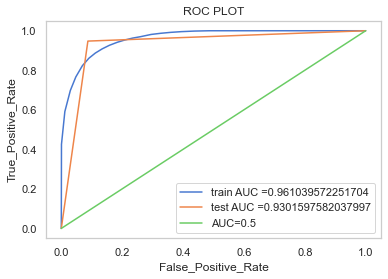

In [138]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

neigh = KNeighborsClassifier(n_neighbors=19)
neigh.fit(Xi_train, y_train)



y_train_pred = neigh.predict_proba(Xi_train)[:,1]    
#y_test_pred = neigh.predict_proba(Xi_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(yi_val, y_val_pred)

#test_fpr, test_tpr, te_thresholds = roc_curve(outputtest, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))

x=np.arange(0,1.1,0.1) #auc=0.5 line 
sns.lineplot(x,x,label="AUC=0.5")

plt.legend()
plt.xlabel("False_Positive_Rate")
plt.ylabel("True_Positive_Rate")
plt.title("ROC PLOT")
plt.grid()
plt.show()

In [139]:
log_loss = metrics.log_loss(yi_val,y_val_pred) #getting logloss
print(log_loss)
print("The log loss after applying K-NN with k value of 19 is found to be:",(log_loss))
    

2.4122314224885546
The log loss after applying K-NN with k value of 19 is found to be: 2.4122314224885546


# XG-Boost Model

In [140]:
import xgboost as xgb

In [141]:
xgb_model = xgb.XGBClassifier(n_jobs=-1,nthread=-1,scale_pos_weight=1,learning_rate=0.02,colsample_bytree = 0.7,subsample = 0.8,
                      objective='binary:logistic', n_estimators=500,reg_alpha = 0.,max_depth=5, random_state=42)

In [142]:
eva_metric = ['auc','error']
%time xgb_model.fit(Xii_train,yi_train,eval_set=[(Xii_val,yi_val)],eval_metric=eva_metric,verbose=True)

[0]	validation_0-auc:0.87470	validation_0-error:0.21359
[1]	validation_0-auc:0.87740	validation_0-error:0.21247
[2]	validation_0-auc:0.87853	validation_0-error:0.21215
[3]	validation_0-auc:0.88240	validation_0-error:0.21564
[4]	validation_0-auc:0.88696	validation_0-error:0.19804
[5]	validation_0-auc:0.88924	validation_0-error:0.18973
[6]	validation_0-auc:0.88980	validation_0-error:0.19560
[7]	validation_0-auc:0.88918	validation_0-error:0.19747
[8]	validation_0-auc:0.89182	validation_0-error:0.19157
[9]	validation_0-auc:0.89402	validation_0-error:0.18707
[10]	validation_0-auc:0.89550	validation_0-error:0.17991
[11]	validation_0-auc:0.89691	validation_0-error:0.17688
[12]	validation_0-auc:0.90154	validation_0-error:0.17127
[13]	validation_0-auc:0.90541	validation_0-error:0.16652
[14]	validation_0-auc:0.90570	validation_0-error:0.16757
[15]	validation_0-auc:0.90753	validation_0-error:0.16602
[16]	validation_0-auc:0.90928	validation_0-error:0.16364
[17]	validation_0-auc:0.91140	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              random_state=42, reg_alpha=0.0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

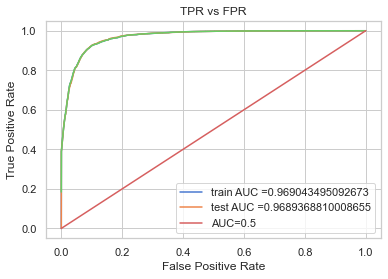

In [143]:
y_train_gg = xgb_model.predict_proba(Xii_train) [:,1]
y_test_gg = xgb_model.predict_proba(Xii_val) [:,1]
train_fpr_gg, train_tpr_gg, train_threshy_gg = roc_curve(yi_train, y_train_gg)
test_fpr_gg, test_tpr_gg, test_threshy_gg = roc_curve(yi_val, y_test_gg)
plt.plot(train_fpr_gg, train_tpr_gg, label="train AUC ="+str(auc(train_fpr_gg, train_tpr_gg)))
plt.plot(test_fpr_gg, test_tpr_gg, label="test AUC ="+str(auc(test_fpr_gg, test_tpr_gg)))
sns.lineplot(train_fpr_gg, train_tpr_gg)
x=np.arange(0,1.1,0.1) #auc=0.5 line 
sns.lineplot(x,x,label="AUC=0.5")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TPR vs FPR")
plt.grid(True)
plt.show()

In [144]:
log_loss = metrics.log_loss(yi_val,y_test_gg) #getting logloss
print(log_loss)
print("The log loss after applying XG-Boost is found to be:",(log_loss))
    

0.23970204435048564
The log loss after applying XG-Boost is found to be: 0.23970204435048564


In [1]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable



p = PrettyTable()
p.field_names = ["Model",  "Metric:Log-Loss", "Metric:Train-AUC", "Metric:Test-AUC"]

p.add_row(["K-NN(k=1)", 2.4122, 0.9837, 0.9301])
p.add_row(["K-NN(k=19)", 2.4122, 0.9610, 0.9301])
p.add_row(["Logistic-Regression", 0.5449, 0.8088, 0.8072])
p.add_row(["Naive-Bayes", 1.6718, 0.7459, 0.7421])
p.add_row(["Decision-Trees", 0.5448, 0.9355, 0.8075])
p.add_row(["Light-GBM", 0.2301, 0.9711, 0.9710])
p.add_row(["Random-Forest", 0.3779, 0.9178, 0.9142])
p.add_row(["XG-Boost", 0.2397, 0.9690, 0.9689])
p.add_row(["Cat-Boost_Classifier",  0.2399, 0.9685, 0.9681])

print(p)

+----------------------+-----------------+------------------+-----------------+
|        Model         | Metric:Log-Loss | Metric:Train-AUC | Metric:Test-AUC |
+----------------------+-----------------+------------------+-----------------+
|      K-NN(k=1)       |      2.4122     |      0.9837      |      0.9301     |
|      K-NN(k=19)      |      2.4122     |      0.961       |      0.9301     |
| Logistic-Regression  |      0.5449     |      0.8088      |      0.8072     |
|     Naive-Bayes      |      1.6718     |      0.7459      |      0.7421     |
|    Decision-Trees    |      0.5448     |      0.9355      |      0.8075     |
|      Light-GBM       |      0.2301     |      0.9711      |      0.971      |
|    Random-Forest     |      0.3779     |      0.9178      |      0.9142     |
|       XG-Boost       |      0.2397     |      0.969       |      0.9689     |
| Cat-Boost_Classifier |      0.2399     |      0.9685      |      0.9681     |
+----------------------+----------------

Thus, Light-GBM gives the best log-loss i.e. 0.2273 and best AUC-Score of 0.9717 out of all the other models

# Custom Ensemble Classifier / Stacking Classifier

In [75]:
Xi_train.shape #Check shape of data

(138956, 882)

In [76]:
Xi_train = pd.DataFrame(Xi_train) #convert into pandas dataframe
Xi_train

,0,1,2,3,4,5,6,7,8,9,...,872,873,874,875,876,877,878,879,880,881
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001545
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002003
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002822
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002671
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138951,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003059
138952,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004843
138953,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004760
138954,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005091


In [77]:
y_train.shape

(138956,)

Now, split the data in the ratio of 80:20

In [78]:
Xii_train,Xii_val,yi_train,yi_val = model_selection.train_test_split(Xi_train,y_train,stratify=y_train,test_size=0.20)
print(Xii_train.shape)
print(Xii_val.shape)
print(yi_train.shape)
print(yi_val.shape)

(111164, 882)
(27792, 882)
(111164,)
(27792,)


Now, in the 80 percent train-set, split the train-set into two sets in the ratio (50:50)

In [79]:
D1_train, D2_train, D1_test, D2_test = model_selection.train_test_split(Xii_train,yi_train,stratify=yi_train,test_size=0.50)
print(D1_train.shape)
print(D1_test.shape)
print(D2_train.shape)
print(D2_test.shape)

(55582, 882)
(55582,)
(55582, 882)
(55582,)


In [80]:
type(D1_train)

pandas.core.frame.DataFrame

In [81]:
type(D1_test)

pandas.core.series.Series

In [82]:
D1_train.head()

,0,1,2,3,4,5,6,7,8,9,...,872,873,874,875,876,877,878,879,880,881
135066,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005262
67114,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005091
131889,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002423
133204,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005088
24393,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005091


In [83]:
D2_train.head()

,0,1,2,3,4,5,6,7,8,9,...,872,873,874,875,876,877,878,879,880,881
86396,1.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003641
96885,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.503802,0.496198,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002140
27416,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007499
121045,1.0,0.0,0.0,1.0,0.0,0.0,0.035762,0.964238,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003363
132573,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004217


In [84]:
import random
import numpy as np
def sampling_data(input_data, target_data):
    selected_row_indices=np.sort(np.random.choice(list(input_data.index),size=int((60/100)*len(input_data)),replace=False))
    replaced_row_indices=np.sort(np.random.choice(list(selected_row_indices),size=len(selected_row_indices)-100,replace=False))
    selected_column_indices=np.sort(np.random.choice(input_data.shape[1],size=random.randint(3,6),replace=False))
    sample_data=input_data.loc[list(selected_row_indices),input_data.columns[selected_column_indices]]
    target_of_sample_data=target_data.loc[list(selected_row_indices)]
    replicated_sample_data=[]
    replicated_sample_data=sample_data.loc[list(replaced_row_indices)]
    target_of_replicated_sample_data=[]
    target_of_replicated_sample_data=target_of_sample_data.loc[list(replaced_row_indices)]
    final_sample_data=pd.concat([sample_data,replicated_sample_data])
    final_target_data=pd.concat([target_of_sample_data,target_of_replicated_sample_data])
    return final_sample_data , final_target_data, selected_row_indices, input_data.columns[selected_column_indices]

From D1, do sampling with replacement to create d1,d2,d3, d4, d5....(k samples).

In [85]:
input_data_list =[]
output_data_list =[]
selected_rows_list = []
selected_columns_list =[]
for k in range(4):
    a,b,c,d=sampling_data(D1_train, D1_test)
    input_data_list.append(a)
    output_data_list.append(b)
    selected_rows_list.append(c)
    selected_columns_list.append(d)

In [86]:
len(input_data_list)

4

Now, train the base models

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

Now create 'k' models and train each of these models with each of these k samples.

In [96]:
from tqdm import tqdm
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import SVC

After conducting sampling with replacement on D1_Train, Train multiple models on D1-Train set (multiple models include heterogenous models and even weak learners such as Logistic-Regression, SVM.

In [97]:
base_models = []

clf_models = [ensemble.RandomForestClassifier(bootstrap=True,class_weight='balanced',
                       criterion='gini', max_depth=1000),DecisionTreeClassifier(max_depth=100),KNeighborsClassifier(n_neighbors=19),SVC(kernel = 'linear', probability=True),LogisticRegression()]

#sample_data={};target_data={}
for i in tqdm(range(4)):
    current_model = clf_models[i]
    # sample_data to train current model
    sample_x = (normalize(input_data_list[i])) #normalize
    sample_y = (np.ravel(output_data_list[i]))                   
    # train curr_model
    current_model.fit(sample_x, sample_y)
    base_models.append(current_model)

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [27:56<00:00, 419.08s/it]


All trained models are stored in a list named "base_models"

In [98]:
base_models

[RandomForestClassifier(class_weight='balanced', max_depth=1000),
 DecisionTreeClassifier(max_depth=100),
 KNeighborsClassifier(n_neighbors=19),
 SVC(kernel='linear', probability=True)]

In [99]:
base_models[0]

RandomForestClassifier(class_weight='balanced', max_depth=1000)

After having trained the models on D1_Train set, these models will be used for prediction on the remaining test-data set. We will have separate predictions for each of the models (one for Logistic-Regression, another for SVM, third one for Random Forest Classifier and one more for KNeighbors Classifier)

In [100]:
D2_train

,0,1,2,3,4,5,6,7,8,9,...,872,873,874,875,876,877,878,879,880,881
86396,1.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003641
96885,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.503802,0.496198,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002140
27416,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007499
121045,1.0,0.0,0.0,1.0,0.0,0.0,0.035762,0.964238,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003363
132573,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5252,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002416
131606,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005482
17567,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003393
117862,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004278


Now, pass the D2 Train Set to each of these k-models; to be able to get k predictions for D2 from each one of those models

In [101]:
import pickle as pk

In [102]:
predictions_d1_train=[]
predictions_d2_train=[]


for i in tqdm(range(4)):
    pk.dump(base_models[i], open(str(i)+'.pk', 'wb'))    
    predictions_d1_train.append(base_models[i].predict_proba(normalize(D1_train[selected_columns_list[i]]))) #normalize(data[selected_columns_list[k]
    predictions_d2_train.append(base_models[i].predict_proba(normalize(D2_train[selected_columns_list[i]]))) #normalize(data[selected_columns_list[k]
    

100%|█████████████████████████████████████████████████████████████████████████████████| 4/4 [1:06:27<00:00, 996.96s/it]


In [103]:
#Prepare thr Dataset for Meta Model by Generating the Meta-Data from k models by passing the D2 set
meta_data_1 = pd.DataFrame(np.row_stack(predictions_d1_train))

meta_data_2 = pd.DataFrame(np.row_stack(predictions_d2_train))


In [104]:
dic={};dic_test={}
for j in range(4):
    dic[j] = base_models[j].predict(normalize(D1_train[selected_columns_list[j]]))
    dic_test[j] = base_models[j].predict(normalize(D2_train[selected_columns_list[j]]))

Data-Frames are created with each row having the predicted-class for each point in D1_Train and D2_Train respectively.

In [105]:
data_for_metamodel=pd.DataFrame.from_dict(dic)
data_for_test_metamodel=pd.DataFrame.from_dict(dic_test)

In [106]:
data_for_metamodel #created from D1_Train set and we already know its corresponding target values

,0,1,2,3
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
55577,0,1,0,0
55578,0,1,0,0
55579,0,1,0,0
55580,0,1,0,0


In [107]:
data_for_test_metamodel # created from D2_train set and we already know its corresponding target-values

,0,1,2,3
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
55577,0,1,0,0
55578,0,1,0,0
55579,0,1,0,0
55580,0,1,0,0


Now, for model evaluation, we can use the 20 percent data that we kept aside as test set. Pass that test-set to each of the base-models to be able to get k-predictions

In [108]:
predictions_of_test=[]

for i in tqdm(range(4)):
    pk.dump(base_models[i], open(str(i)+'.pk', 'wb'))    
    predictions_of_test.append(base_models[i].predict_proba(normalize(Xii_val[selected_columns_list[i]]))) #normalize(data[selected_columns_list[k]
                                                                   #normalize(data[selected_columns_list[k]
    

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [03:13<00:00, 48.31s/it]


Now, using these k predictions, we create a new dataset and pass it to our meta-model to get the final predictions

In [109]:
dict_here={}
for k in range(4):
    dict_here[k] = base_models[k].predict(normalize(Xii_val[selected_columns_list[k]]))

In [110]:
data_for_metamodel_test_set = pd.DataFrame.from_dict(dict_here)

In [111]:
data_for_metamodel_test_set

,0,1,2,3
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
27787,0,1,0,0
27788,0,1,0,0
27789,0,1,0,0
27790,0,1,0,0


In [112]:
from xgboost import XGBClassifier

In [113]:
xgb_model=XGBClassifier(verbosity=1)
xgb_model.fit(data_for_metamodel_test_set, yi_val)


[13:36:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

In [114]:
predi = xgb_model.predict(data_for_metamodel_test_set)

Using this final_prediction that we got above, we can calculate F1_Score as we already know the target-scores for our test set

In [115]:
from sklearn.metrics import f1_score
f1_score(yi_val, predi, average='micro')

0.5002878526194589

In [116]:
log_loss_here = metrics.log_loss(yi_val,predi) #getting logloss
print(log_loss_here)
print("The log loss after applying Meta Classifier is found to be:",(log_loss_here))
    

17.25944614896794
The log loss after applying Meta Classifier is found to be: 17.25944614896794


Thank-you!!!!